# Про astropy

`astropy` — обширная библиотека для обработки астрономических данных, активно разрабатываемая сообществом ученых-энтузиастов. Именно `astropy` лежит в основе экосистемы современных астрономических пакетов в Python, так как реализует разнообразнейшие методы наблюдательной и теоретической астрономии.

`astropy` создан в ответ на растущий запрос в стандартизованном, поддерживаемом и совместимом программном обеспечении для астрономического сообщества. До `astropy`, исследователи зачастую опирались на разрозненные самописные инструменты, устаревшие и несовместимые друг с другом, что затрудняло сотрудничество, воспроизводимость и долговременную поддержку. Сегодня `astropy` стал де-факто стандартом в обработке астрономических данных с помощью Python, широко распространившись в академическом и исследовательском поле.

Библиотека базируется на следующих принципах:

1) **Научная точность:** тщательно проверенные и утвержденные инструменты для реальных задач
2) **Воспроизводимость:** стимулирование прозрачного анализа данных с помощью отслеживания единиц измерения, метаданных и открытых стандартов
3) **Совместимость:** бесшовная интеграция с другими научными библиотеками (NumPy, SciPy, Matplotlib)
4) **Модульность:** индивидуальные подпакеты, разработанные для отдельных областей астрономического знания
5) **Управление сообществом:** открытая модель, разработанная астрономами для астрономов

Подпакеты, включенные в `astropy`:

* Физические единицы измерения (`astropy.units`)
* Физические и астрономические постоянные (`astropy.constants`)
* Преобразования небесных координат (`astropy.coordinates`)
* Временные и календарные системы (`astropy.time`)
* Обработка FITS и других табличных данных (`astropy.io`, `astropy.table`)
* Обработка и преобразование земных координат (World Coordinate System, `astropy.wcs`)
* Аналитическое моделирование и подгонка (`astropy.modeling`)
* Космологические вычисления (`astropy.cosmology`)
* Визуализация изображений (`astropy.visualization`)

Эти компоненты тесно интегрируюстя друг с другом и отлично документированы на английском языке. Это делает `astropy` мощным инструментом не только для исследования, но и для преподавания астрономического анализа данных.

**Замечание:**
Если вы ещё не установили бибилотеки ниже, установите их, запустив ячейку ниже с помощью `SHIFT+ENTER`:

In [1]:
!pip install astropy astroquery

## Размерные величины и постоянные в astropy

Астрономические вычисления обычно включают в себя работу с физическими величинами, выраженными в различных специализированных единицах. В отличие от стандартизованной системы СИ, используемой физиками, астрономы часто используют исторически или практически обусловленные единицы вроде **парсеков**, **астрономических единиц**, **солнечных масс и светимостей**, и единиц для энергетических потоков вроде **янских**.

`astropy` предоставляет три тесно связанных компоненты для упрощения работы с этими разномастными величинами, сохраняя научную строгость: 

### 1. Единицы измерения (`astropy.units`)
Единицы измерения нужны для измерения различных физических величин, например, парсеки, километры в секунду, или солнечные массы. `astropy` упрощает взаимодействие с единицами измерения, позволяя с легкостью и надежностью преобразовывать одни в другие, автоматически следя за их постоянством.

### 2. Размерные величины (Quantities)
Размерная величина есть комбинация числа и соотвествующей единицы измерения, например, `10 пк` или `1.5 M⊙`. Объекты класса `astropy.units.Quantity` автоматически отслеживает размерности, избавляя от шансов совершить ошибку из-за преобразований величин вручную.

### 3. Постоянные (`astropy.constants`)
Постоянные есть фундаментальные физические параметры, такие как ньютоновская постоянная гравитации (`G`), скорость света (`c`), или масса Солнца (`M_sun`). `astropy` предоставляет эти константы предопределенным с точным численным значением и единицей измерения согласно общепринятым стандартам Международного Астрономического Союза. Благодаря этому можно не переживать за воспроизводимость и аккуратность вычислений, опирающихся на эти константы. 

Все вместе, **единицы измерения**, **размерные величины** и **постоянные** образуют надежный фундамент для прозрачных и надежных физических вычислений. Включая единицы измерения непосредственно в вычисления, `astropy` стимулирует лучшие практики научного программирования и кратно упрощает анализ.

In [2]:
from astropy import units as u # общепринятое сокращение для набора единиц измерения

# определим простейшие размерные величины и запишем их в переменные
distance = 1000 * u.km          # расстояние в км
velocity = 200 * u.km / u.s   # скорость в км/с
time = distance / velocity # а что тут?

Каждая из этих переменных есть объект класса `astropy.units.Quantity`, который хранит в себе одновременно численное значение и физическую единицу измерения. Эти объекты могут быть использованы непосредственно в вычислениях, при этом всевозможные преобразования единиц измерения будут отслеживаться автоматически. 

In [3]:
print(type(time))
print(distance)
print(velocity)
print(time)

<class 'astropy.units.quantity.Quantity'>
1000.0 km
200.0 km / s
5.0 s


In [4]:
print(f"Расстояние: distance = {distance:.2f}") # обратите внимание, что форматирование работает!
print(distance.unit) # единица измерения величины
print(distance.value) # численное значение величины
print(type(distance.value)) # тип численного значения, как правило, NumPy float

Расстояние: distance = 1000.00 km
km
1000.0
<class 'numpy.float64'>


## Примеры единиц измерения в astropy
Неполный список, взято из <https://docs.astropy.org/en/stable/units/ref_api.html#module-astropy.units>

### Единицы длины

| Единица    | Описание                | Представление   |
|------------|-------------------------|-----------------|
| м          | метр                    | `u.m`           |
| см         | сантиметр               | `u.cm`          |
| мм         | миллиметр               | `u.mm`          |
| нм         | нанометр                | `u.nm`          |
| км         | километр                | `u.km`          |
| Å          | ангстрем                | `u.Angstrom`    |
| а.е.       | астрономическая единица | `u.au`          |
| пк         | парсек                  | `u.pc`          |
| св. год    | световой год            | `u.lyr`         |
| $R_\odot$  | радиус Солнца           | `u.R_sun`       |
| $R_\oplus$ | радиус Земли            | `u.R_earth`     |
| $R_{Юп}$   | радиус Юпитера          | `u.R_jup`       |
| $R_{Лун}$  | радиус Луны             | `u.R_moon`      |

### Единицы времени

| Единица    | Описание      | Представление |
|------------|---------------|---------------|
| c          | секунда       | `u.s`         |
| мс         | миллисекунда  | `u.ms`        |
| мкс        | микросекунда  | `u.us`        |
| нс         | наносекунда   | `u.ns`        |
| м          | минута        | `u.min`       |
| ч          | час           | `u.h`         |
| сут        | сутки         | `u.day`       |
| год        | юлианский год | `u.yr`        |
| млрд. лет  | миллиард лет  | `u.Gyr`       |

### Единицы массы

| Единица    | Описание              | Представление |
|------------|-----------------------|---------------|
| кг         | килограмм             | `u.kg`        |
| г          | грамм                 | `u.g`         |
| мг         | миллиграмм            | `u.mg`        |
| мкг        | микрограмм            | `u.ug`        |
| а.е.м      | атомная единица массы | `u.u`         |
| $M_\odot$  | масса Солнца          | `u.M_sun`     |
| $M_\oplus$ | масса Земли           | `u.M_earth`   |
| $M_{Юп}$   | масса Юпитера         | `u.M_jup`     |
| $M_{Лун}$  | масса Луны            | `u.M_moon`    |

### Единицы температуры

| Единица    | Описание          | Представление      |
|------------|-------------------|--------------------|
| К          | кельвины          | `u.K`              |
| $^\circ C$ | градус Цельсия    | `u.deg_C`          |
| $^\circ F$ | градус Фаренгейта | `u.imperial.deg_F` |

### Единицы энергии и мощности

| Единица   | Описание             | Представление |
|-----------|----------------------|---------------|
| Дж        | джоуль               | `u.J`         |
| эрг       | эрг                  | `u.erg`       |
| эВ        | электрон-вольт       | `u.eV`        |
| кэВ       | килоэлектрон-вольт   | `u.keV`       |
| МэВ       | мегаэлектрон-вольт   | `u.MeV`       |
| ГэВ       | гигаэлектрон-вольт   | `u.GeV`       |
| Вт        | ватт                 | `u.W`         |
| $L_\odot$ | солнечная светимость | `u.L_sun`     |

### Единицы площади и объема

| Единица | Описание         | Представление |
|---------|------------------|---------------|
| м²      | квадратный метр  | `u.m**2`      |
| (а.е)²  | квадратная а.е.  | `u.au**2`     |
| м³      | кубический метр  | `u.m**3`      |
| л       | литр             | `u.L`         |

### Единицы частоты

| Единица | Описание      | Представление |
|---------|---------------|---------------|
| Гц      | герц          | `u.Hz`        |
| кГц     | килогерц      | `u.kHz`       |
| МГц     | мегагерц      | `u.MHz`       |
| ГГц     | гигагерц      | `u.GHz`       |
| ТГц     | терагерц      | `u.THz`       |

### Электрические единицы

| Единица | Описание      | Представление |
|---------|---------------|---------------|
| Кл      | кулон         | `u.C`         |
| В       | вольт         | `u.V`         |
| А       | ампер         | `u.A`         |
| Ом      | ом            | `u.ohm`       |
| См      | сименс        | `u.S`         |
| Ф       | фарад         | `u.F`         |
| Гн      | генри         | `u.H`         |
| Тл      | тесла         | `u.T`         |
| Вб      | вебер         | `u.Wb`        |

### Единицы излучения и потоков

| Единица           | Описание                                 | Представление                  |
|-------------------|------------------------------------------|--------------------------------|
| Ян                | янский                                   | `u.Jy`                         |
| фотон             | штуки фотонов (безразмерная)             | `u.photon`                     |
| Вт/(м² Гц стерад) | спектральная энергетическая яркость (СИ) | `u.W / (u.m**2 * u.Hz * u.sr)` |
| эрг/(с см²)       | плотность потока энергии (СГС)           | `u.erg / (u.s * u.cm**2)`      |

### Плоские и телесные углы

| Единица  | Описание          | Представление |
|----------|-------------------|---------------|
| $^\circ$ | градус            | `u.deg`       |
| $'$      | угловая минута    | `u.arcmin`    |
| $''$     | угловая секунда   | `u.arcsec`    |
| мсд      | миллисекунда дуги | `u.mas`       |
| рад      | радиан            | `u.rad`       |
| стерад   | стерадиан         | `u.sr`        |

### Безразмерные единицы

| Единица                  | Описание               | Представление              |
|--------------------------|------------------------|----------------------------|
|                          | чистое число           | `u.dimensionless_unscaled` |
| dex, dec                 | десятичный логариф     | `u.dex`                    |
| зв. вел.                 | звездная величина      | `u.mag`                    |
| %                        | процент                | `u.percent`                |
| ppm                      | частей на миллион      | `u.ppm`                    |
| шт.                      | штуки                  | `u.count`                  |

In [5]:
distance_pc = u.Quantity(5, u.pc) # ещё один способ задать величину из значения и единицы измерения
print(f"Расстояние: {distance_pc:.2f}")

Расстояние: 5.00 pc


In [6]:
speed_of_light = u.Quantity(1, u.lyr/u.year)
print(f"Скорость света [в световых годах в год]: {speed_of_light:.2f}")  
print(f"Скорость света [в км/c]: {speed_of_light.to(u.km/u.s):.2f}") # магия конвертации в другие единицы осуществляется методом .to()

Скорость света [в световых годах в год]: 1.00 lyr / yr
Скорость света [в км/c]: 299792.46 km / s


### Преобразование единиц измерения

Одним из ключевых преимуществ объектов типа `astropy.units.Quantity` является способность преобразовать численное значение величины в другие совместимые единицы с помощью метода `.to()`.

Объект класса `Quantity` — это пара из числа и физической единицы измерения. Если вам нужно выразить эту величину в иных единицах (например, метры выразить в километрах, или джоули в электрон-вольтах), метод `.to()` позволяет это сделать с легкостью:

#### Синтаксис:
```python
преобразованная_величина = оригинальная_величина.to(новые_единицы_измерения)
```

#### Пример:
Преобразовать 1.5 пк в световые года можно следующим образом:

```python
(1.5 * u.pc).to(u.lyr)
```

Метод вернет новый объект класса `Quantity`, содержащий физическую величину в нужной размерности.

Метод `.to()` позволяет программисту четко и явно задавать единицы измерения физических величин во входных данных, не переживая за преобразования величин, что упрощает физический анализ в разы.

In [7]:
print(f"Расстояние в парсеках: {distance_pc:.2f}")
print(f"Расстояние в миллипарсеках: {distance_pc.to(u.mpc):.2f}") # десятичные приставки для большинства величин определены без проблем
print(f"Расстояние в световых годах: {distance_pc.to(u.lyr):.2f}")
print(f"Расстояние в астрономических единицах: {distance_pc.to(u.au):.2f}")
print(f"Расстояние в радиусах Солнца: {distance_pc.to(u.R_sun):.2f}")
print(f"Расстояние в километрах: {distance_pc.to(u.km):.2f}") 
print(f"Расстояние в миллиметрах: {distance_pc.to(u.mm):.2f}") 
print(f"Расстояние в пикометрах: {distance_pc.to(u.pm):.2f}")

Расстояние в парсеках: 5.00 pc
Расстояние в миллипарсеках: 5000.00 mpc
Расстояние в световых годах: 16.31 lyr
Расстояние в астрономических единицах: 1031324.03 AU
Расстояние в радиусах Солнца: 221767829.63 solRad
Расстояние в километрах: 154283879074568.38 km
Расстояние в миллиметрах: 154283879074568339456.00 mm
Расстояние в пикометрах: 154283879074568357719543119872.00 pm


#### Замечание:
- Требуемые единицы (`новые_единицы_измерения`) должны иметь **ту же размерность**, что и исходные.
- В противном случае (например, при попытке преобразовать длину в секунды), `astropy` вызовет ошибку `UnitConversionError`:

In [8]:
distance_pc.to(u.s)

UnitConversionError: 'pc' (length) and 's' (time) are not convertible

In [9]:
# встроенные методы .si и .cgs позволяют представить величину в стандартах СИ и СГС
print(f"Скорость света (СИ): {speed_of_light.si:.2f}")
print(f"Скорость света (СГС): {speed_of_light.cgs:.2f}")
# метод .to_value(новая_единица) аналогичен .to(новая_единица).value, полезно, когда нужно только число
print(f"Значение скорости света в мм/нс: {speed_of_light.to_value(u.mm/u.ns):.2f}")

Скорость света (СИ): 299792458.00 m / s
Скорость света (СГС): 29979245800.00 cm / s
Значение скорости света в мм/нс: 299.79


## Постоянные

Теперь, когда мы знаем, как определять физические величины с явными единицами измерения с помощью `astropy.units`, следующим логичным шагом будет включить фундаментальные физические постоянные напрямую в наши вычисления.

`astropy` упрощает этот шаг с помощью подпакета [`astropy.constants`](https://docs.astropy.org/en/stable/constants/), в котором представлена богатая коллекция физических и астрономических постоянных, каждая из которых приведена как величина с соответствующей ей единицей измерения.

Постоянные в этом модуле не просто числа или объекты типа `Quantity`, они имеют специальный тип `astropy.constants.Constant`, что означает, что каждая постоянная включает в себя:
- точное численное значение вместе с неопределенностью (определенное комитетом по сбору данных CODATA или МАС)
- единицу измерения (совместимую с `astropy.units`),
- описание,
- поддержку бесшовной интеграции с остальными подпакетами `astropy`.

Это обуславливает постоянство и научную строгость при использовании постоянных в выражениях и формулах внутри кода.

### Преимущества в использовании `astropy.constants`

- Аккуратность: все постоянные базируются на самых последних и надежных научных данных.
- Встроенные единицы: каждая постоянная представлена вместе с единицей измерения, что позволяет без проблем её использовать вместе с другими размерными величинами.
- Удобство: постоянные доступны по имени — больше не надо запоминать конкрентые численные значения или производить ручные преобразования величин.
- Постоянство: постоянные не меняются от проекта к проекту, что позволяет научным группам избежать несовпадающих предположений об их значении.
- Читаемость: код становится самодокументируемым, когда константы используются по их общепринятому имени.

### Типы констант

- **Фундаментальные физические постоянные**: гравитационная постоянная, постоянные Планка и Больцмана, скорость света, заряд электрона...
- **Астрономические постоянные**: Солнечная масса, радиус и светимость; параметры главных планет; астрономическая единица, парсек, световой год...
- **Производные постоянные излучения**: постоянная Вина, Ридберга, Стефана-Больцмана, томпсоновское сечение рассеяния...


# Постоянные в astropy (система СИ)

## Физические постоянные

| Обозначение | Описание                          | Значение                    | Единица измерения |
|-------------|-----------------------------------|-----------------------------|-------------------|
| `G`      | Гравитационная постоянная               | 6.67430e-11                   | м³ / (кг с²)     |
| `c`      | Скорость света в вакууме             | 2.99792458e8                  | м / с            |
| `h`      | Постоянная Планка                      | 6.62607015e-34                | Дж с              |
| `hbar`      | Приведённая постоянная Планка              | 1.054571817e-34               | Дж с              |
| `k_B`    | Постоянная Больцмана                   | 1.380649e-23                  | Дж / К            |
| `sigma_sb`| Постоянная Стефана–Больцмана           | 5.670374419e-8                | Вт / (м² К⁴)      |
| `R`      | Универсальная газовая постоянная                   | 8.314462618                   | Дж / (моль К)      |
| `N_A`    | Число Авогадро                    | 6.02214076e23                 | 1 / моль          |
| `e`      | Элементарный заряд                    | 1.602176634e-19               | Кл                |
| `m_e`    | Масса электрона                        | 9.1093837015e-31              | кг               |
| `m_p`    | Масса протона                          | 1.67262192369e-27             | кг               |
| `m_n`    | Масса нейтрона                         | 1.67492749804e-27             | кг               |
| `mu_B`   | Магнетон Бора                        | 9.2740100783e-24              | Дж / Тл            |
| `mu_N`   | Ядерный магнетон                     | 5.0507837461e-27              | Дж / Тл            |
| `alpha`  | Постоянная тонкой структуры              | 7.2973525693e-3               | безразмерная    |
| `sigma_T`| Томсоновское сечение рассеяния     | 6.6524587321e-29              | м²               |
| `eps0`   | Диэлектрическая проницаемость вакуума | 8.8541878128e-12           | Ф / м            |
| `mu0`    | Магнитная проницаемость вакуума | 1.25663706212e-6          | Н / А²           |
| `atm`    | Стандартная атмосфера                  | 101325                        | Па               |
| `g0`     | Стандартное ускорение свободного падения                     | 9.80665                       | м / с²           |
| `u`      | Атомная единица массы                     | 1.66053906660e-27             | кг               |
| `Ryd`    | Постоянная Ридберга                     | 10973731.568160               | 1 / м            |
| `a0`     | Боровский радиус                          | 5.29177210903e-11             | м                |
| `b_wien` | Постоянная Вина | 2.897771955e-3                | м К              |

## Астрономические постоянные

| Обозначение | Описание                       | Значение                         | Единица измерения             |
|-------------|-----------------------------------|-------------------------------|------------------|
| `M_sun`    | Масса Солнца                        | 1.98847e30                    | кг               |
| `R_sun`    | Радиус Солнца                      | 6.957e8                       | м                |
| `L_sun`    | Светимость Солнца                  | 3.828e26                      | Вт                |
| `M_earth`  | Масса Земли                        | 5.9722e24                     | кг               |
| `R_earth`  | Радиус Земли (экваториальный)         | 6.3781e6                      | м                |
| `R_jup`    | Радиус Юпитера                    | 7.1492e7                      | м                |
| `au`       | Астрономическая единица                 | 1.495978707e11                | м                |
| `pc`       | Парсек                            | 3.085677581e16                | м                |
| `lyr`      | Световой год                        | 9.460730472e15                | м                |
| `kpc`      | Килопарсек                        | 3.08567758e19                 | м                |
| `GM_earth` | Гравитационный параметр Земли   | 3.986004e14                   | м³ / с²          |
| `GM_jup`   | Гравитационный параметр Юпитера | 1.2668653e17                  | м³ / с²          |
| `GM_sun`   | Гравитационный параметр Солнца     | 1.3271244e20                  | м³ / с²          |
| `L_bol0`   | Светимость при $M_{bol} = 0^m$ | 3.0128e28                     | Вт                |

In [10]:
from astropy.constants import c # импортировать можно непосредственно по обозначению
print(c)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018


In [11]:
from astropy import constants as const # или так
print(const.k_B) 

  Name   = Boltzmann constant
  Value  = 1.380649e-23
  Uncertainty  = 0.0
  Unit  = J / K
  Reference = CODATA 2018


In [12]:
print(c.to(u.pc/u.year)) # преобразовывать можно аналогично другим величинам
print(const.c.cgs)

from IPython.display import Math, display
display(Math(f"{c:latex}")) # чучуть магии IPython

0.30660139378555057 pc / yr
29979245800.0 cm / s


<IPython.core.display.Math object>

## Пример: светимость коричневого карлика через закон Стефана-Больцмана

В этом примере рассмотрим, как `astropy.units` и `astropy.constants` могут без проблем взаимодействовать друг с другом.

Сосчитаем **полную энергетическую светимость** $L$ коричневого карлика через **закон Стефана-Больцмана**:

$$
L = 4\pi R^2 \sigma T^4,
$$

где
- $R$ — **радиус**, который мы определим как 1.6 радиусов Юпитера,
- $T$ — **эффективная температура**, которую мы положим равной 1800 К,
- $\sigma$ — **постоянная Стефана-Больцмана**, которую мы используем из `astropy.constants`.

В этом примере показано:
- Как использовать физические величины и постоянные в реальных выражениях,
- Как величины автоматически преобразуются при математических операциях,
- Как **сравнить результат** с другой постоянной, такой как светимость Солнца `L_sun`.

Финальный ответ дан в **ваттах** и **доле от солнечной светимости**.

In [13]:
from astropy.constants import sigma_sb, L_sun, R_jup
import numpy as np

radius = 1.6 * R_jup
temperature = 1800 * u.K

luminosity = 4 * np.pi * radius**2 * sigma_sb * temperature**4 

print(f"Светимость в Вт: {luminosity:.3e}")
print(f"Доля солнечной светимости: {(luminosity / L_sun):.4f}")

Светимость в Вт: 9.787e+22 W
Доля солнечной светимости: 0.0003


### Упрощение единиц с помощью`.decompose()`

Вызов метода `.decompose()` от объекта типа `Quantity` позволяет произвести упрощение размерных единиц, преобразовав их в основные в стандартной системе (по умолчанию СИ, можно указать и СГС). Обратите внимание, как `.decompose()` отличается от `.to()`.

Использование этого метода полезно для:
- Проверки **фундаментальной формы** единицы измерения величины;
- Отладки сложных формул;
- Сравнения двух величин с **по-разному выглядящими, но эквивалентными единицами измерения**.

In [14]:
ra = 5.666 * u.deg
print(ra)
print(ra.decompose())

g = 980 * u.cm / u.s**2
print(g) 
print(g.decompose())  # в СИ

q = 5 * u.J
print(q) 
print(q.decompose(u.cgs.bases))  # в СГС

x = 50 * u.cm / u.m # "размерная" величина
print(x) 
print(x.decompose()) # в действительности она безразмерна

5.666 deg
0.09889035541799872 rad
980.0 cm / s2
9.8 m / s2
5.0 J
50000000.0 cm2 g / s2
50.0 cm / m
0.5


### Метод `.compose()` как способ возможной интепретации размерной единицы

Метод `.compose()` позволяет записать единицу измерения в виде **известных стандартных комбинаций** из физических наук. Это даёт возможность изнутри кода понять **физический контекст** вычислений. 

Рассмотрим для примера обратную секунду $c^{-1}$, очень часто встречающуюся в разных контекстах (частоты, скорости распада, осцилляции). Хотя технически единица измерения $1/с$ самодостаточна, `.compose()` помогает раскрыть **физические смыслы**, которые за ней могут стоять:

In [15]:
unit = u.s**-1
alternative_units = unit.compose()
print(alternative_units) # список возможных эквивалентных величин

[Unit("Bq"), Unit("Hz"), Unit("2.7027e-11 Ci")]


#### Что это нам говорит:

- `Hz` (герц) используют для измерения частот - число циклов в секунду.
- `Bq` (беккерель) используют для измерения радиоактивности — число распадов в секунду.
- `Ci` (кюри), устаревшая величина, тоже используется для измерения радиоактивности (с масштабным фактором).

Эти величины **размерно идентичны**, однако семантически отличаются — и `.compose()` позволяет их рассмотреть.

## Взаимодействие `astropy.units` с массивами NumPy

`astropy.units` позволяет без проблем создавать размерные массивы NumPy и пользоваться всеми прелестями векторизации.

Объект `Quantity` позволяет привязать единицы измерения непосредственно к массивам. Это открывает возможность пользоваться всеми преимуществами преобразования единиц измерения для операций над числовыми структурами.

### Применяем Стефана-Больцмана к массиву звезд

В предыдущем примере мы подсчитывали светимость субзвезды на основе её радиуса и эффективной температуры с помощью закона Стефана-Больцмана. Давайте теперь применим этот закон для подсчета светимости целого массива звезд с различными температурами.

Здесь показано, как:
- Единицы измерения сохраняются при поэлементных операциях над массивами;
- Можно использовать метод `.to()` для конвертирования целого массива;
- Преобразования влеичин происходят автоматически, что уменьшает риск ошибок.

In [16]:
radii = 1 * u.R_sun         # радиусы звезд
temperatures = np.linspace(3000, 30000, 300) * u.K # эффективные температуры
luminosities = 4 * np.pi * radii**2 * const.sigma_sb * temperatures**4
luminosities.to(u.L_sun)[:10] # преобразуем все величины и покажем 10 из них

<Quantity [0.07297577, 0.08216688, 0.09220002, 0.10312509, 0.11499347,
           0.12785794, 0.14177275, 0.15679356, 0.17297749, 0.19038307] solLum>

In [17]:
np.mean(luminosities.to(u.erg / u.s)) # размерные величины передаются в методы NumPy без проблем

<Quantity 6.23370764e+35 erg / s>

### Построение графиков с учетом размерных единиц через `quantity_support()`

Визуализируем взаимосвязь между эффективной температурой и светимостью, не убирая единицы измерения.

Для этого активируем метод `astropy.visualization.quantity_support()` — он позволяет библиотеке **matplotlib** понимать и показывать единицы измерения осей автоматически. Это означает, что массивы типа `Quantity` можно засовывать прямо в методы построения типа  `plt.plot()` без ручных преообразований.

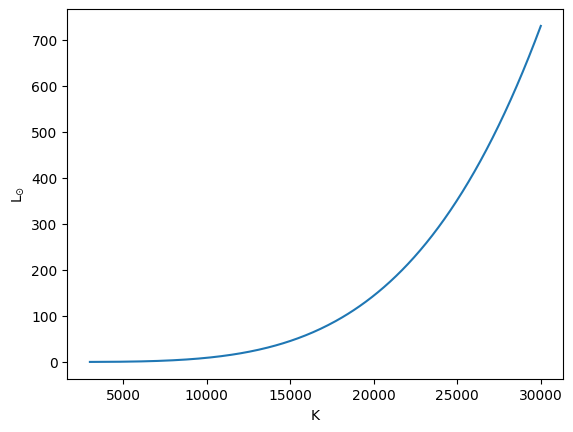

In [18]:
from matplotlib import pyplot as plt
from astropy.visualization import quantity_support
quantity_support()

plt.plot(temperatures,luminosities.to(u.L_sun))

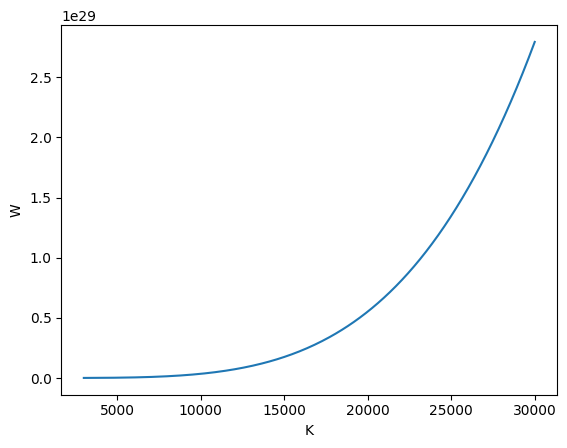

In [19]:
plt.plot(temperatures,luminosities.to(u.W))

#### Что произошло:

- Ось x температур (temperature) в кельвинах, считавшихся автоматически из массива `temperatures` типа `Quantity`.
- Ось y светимостей показана и в светимостях Солнца, и в ваттах,
- Единицы измерения показываются в качестве подписей к осям (`W`, `K` и $L_\odot$).
- График показывает резкий и нелинейный рост светимости с увеличением температуры, в согласии с законом Стефана-Больцмана.

### Для дополнительного ознакомления

- **Эквивалентности (Equivalencies)**  
  Конвертирование между единицами, которые размерно не идентичны, но отличаются на известную физически связующую константу (частота ↔ длина волны ↔ энергия, температура ↔ энергия): <https://docs.astropy.org/en/stable/units/equivalencies.html>

- **Форматирование**  
  Форматированный вывод единиц измерения через LaTeX, Юникод, или текстовую репрезентацию: <https://docs.astropy.org/en/stable/units/format.html>

- **Создание новых единиц**  
  Определение узкоспециализированных единиц измерения для узкоспециализированных нужд: <https://docs.astropy.org/en/stable/units/combining_and_defining.html>

## Упражнение 1: Расстояние из параллаксов

В этом упражнении используйте `astropy.units` для подсчета расстояний до звезд через их **измеренные параллаксы**. 

### Справка

Звездный параллакс как явление — это видимое смещение положения звезды из-за орбитального движения Земли вокруг Солнца. Расстояние $d$ до звезды в **парсеках** обратно пропорционально её параллактическому углу $p$ (который для краткости тоже называют параллаксом) **в угловых секундах**:

$$
d = \frac{1}{p}
$$

**Это размерная формула!** Это означает, что для разных размерностей она работает по-разному. Если параллактический угол дан в **миллисекундах дуги (мсд, mas)**, то формула дает расстояние в **килопарсеках**. Чтобы снова получить расстояние в парсеках:

$$
d = \frac{1000}{p_{\text{мсд}}}
$$

### Дано:

| Звезда             | Параллакс [мсд]|
|--------------------|----------------|
| Проксима Центавра   | 768.5          |
| Альфа Центавра А  | 747.1          |
| Звезда Барнарда     | 548.3          |
| Вульф 359           | 419.1          |
| Лаланд 21185      | 392.6          |
| Сириус A           | 379.2          |
| Звезда Лейтена      | 264.0          |
| Росс 154           | 336.0          |
| Эпсилон Эридана   | 310.9          |
| Лакайль 9352      | 304.2          |

---

### Задачи:

1. Используя `u.mas`, создайте массив `parallaxes` типа `Quantity` из приведенных выше параллаксов звезд.
2. Преобразуйте параллаксы в расстояния в **парсеках** и выведите их.
3. Преобразуйте получившиеся расстояния в **световые года** и в **астрономические единицы**, используя метод `.to()` и соответствующие единицы измерения из `astropy.units`.
4. Считая, что каждый параллакс измерен с абсолютной ошибкой 0.1 мсд, а относительные ошибки расстояния в парсеках равны относительным ошибкам параллаксов, посчитайте ошибку определения расстояния в **парсеках**, **световых годах** и **астрономических единицах**.

## Упражнение 2: к другим звездам со скоростью Вояджера-1

После подсчета расстояний до ближайших звезд, оцените, сколько времени потребуется космическому кораблю, летящему со скоростью Вояджера-1, чтобы пересечь эти расстояния.

### Дано:

- Расстояние $d$ для каждой звезды из предыдущего упражнения;
- Скорость Вояджера-1:  
  $$v = 17\ \text{км/с}.$$

### Задачи

1. Создайте величину скорости `v` с нужной размерностью.

2. Сосчитайте время `t` для полета к каждой звезде.

3. Выразите это время в
   - **секундах**
   - **сутках**
   - **годах**
   - **тысячелетиях**

4. Сравните результаты с временем существования Человека Разумного как вида (около 0.3 мегалет) и возрастом человеческой цивилизации (около 12 килолет) 

## Упражнение 3: планковские величины перебором!

Произведение фундаментальных физических постоянных $G$, $h$ и $с$ в различных степенях позволяет определить единицы времени, длины и массы, называемые планковскими. Но каких именно степенях?

Можно решить эту задачу, поигравшись с размерностями, но давайте решим её перебором! Будем рассматривать только степени со знаменателем 2 и числителями от -6 до 6.

### Дано:
- Константы $G$, $h$ и $с$ из `astropy.constants`

### Задачи:

1. Из модуля `astropy.constants` в переменные `Gu`, `hu` и `cu` запишите только **единицу измерения** соответствующих констант.
2. Создайте массив целых чисел `numerator` от -6 до 6 включительно.
3. Пусть `i`, `j` и `k` - переменные-счетчики, пробегающие по массиву из задачи 2. С помощью вложенных циклов методом `.decompose()` проверьте, является ли `Gu ** (i / 2) * hu ** (j / 2) * cu ** (k / 2)` простой размерностью вида `s`, `kg` или `m`.  Выведите соответствующие степени для `G`, `h` и `с`, а также численное выражение этой величины, преобразуя численные значения констант.